<a href="https://colab.research.google.com/github/cristiansoto-f/reimagined-crypto-optimization/blob/main/CryptoPortfolioOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing and optimizing your crypto portfolio

Using 1inch data.

Ethereum (eth)
Polygon (polygon)
Binance Smart Chain (bsc)
Arbitrum (arbitrum)
Gnosis (gnosis)
Optimism (optimism)
Base (base)

In [5]:
# Import required libraries
import requests
import pandas as pd
from google.colab import userdata

# Step 1: Get API Key
api_key = userdata.get('1inchApiKey')

# Step 2: Define chain IDs and user addresses
chain_ids = {
    "arbitrum": 42161,
    "base": 8453,
    "bsc": 56,
    "ethereum": 1,
    "gnosis": 100,
    "optimism": 10,
    "polygon": 137
}

user_addresses = ['0x65392485b8d869E59B5B2A3Cf7de815ed16939aA', '0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554']

# Step 3: Set up API URL and request options
api_url = "https://api.1inch.dev/portfolio/portfolio/v4/general/value_chart"
headers = {"Authorization": f"Bearer {api_key}"}
timerange = "3years"

# Step 4: Iterate through chains and addresses, collect data
combined_data = []

for chain_name, chain_id in chain_ids.items():
    for address in user_addresses:
        print(f"Fetching data for chain: {chain_name}, address: {address}")
        params = {
            "addresses": [address],
            "chain_id": chain_id,
            "timerange": timerange
        }

        response = requests.get(api_url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json().get("result", [])
            for entry in data:
                combined_data.append({
                    "chain": chain_name,
                    "address": address,
                    "timestamp": entry["timestamp"],
                    "value_usd": entry["value_usd"]
                })
        else:
            print(f"Failed to fetch data for chain: {chain_name}, address: {address}. Status: {response.status_code}")

# Step 5: Convert to pandas DataFrame
df = pd.DataFrame(combined_data)

# Step 6: Analyze composition of all portfolios over time
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Group by timestamp and sum values across all chains and addresses
portfolio_over_time = df.groupby('timestamp')['value_usd'].sum().reset_index()

print(portfolio_over_time)


Fetching data for chain: arbitrum, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: arbitrum, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: base, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: base, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: bsc, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: bsc, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: ethereum, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: ethereum, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: gnosis, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: gnosis, address: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554
Fetching data for chain: optimism, address: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA
Fetching data for chain: optimism, address: 0x8A43e8291f05Fc91d9E

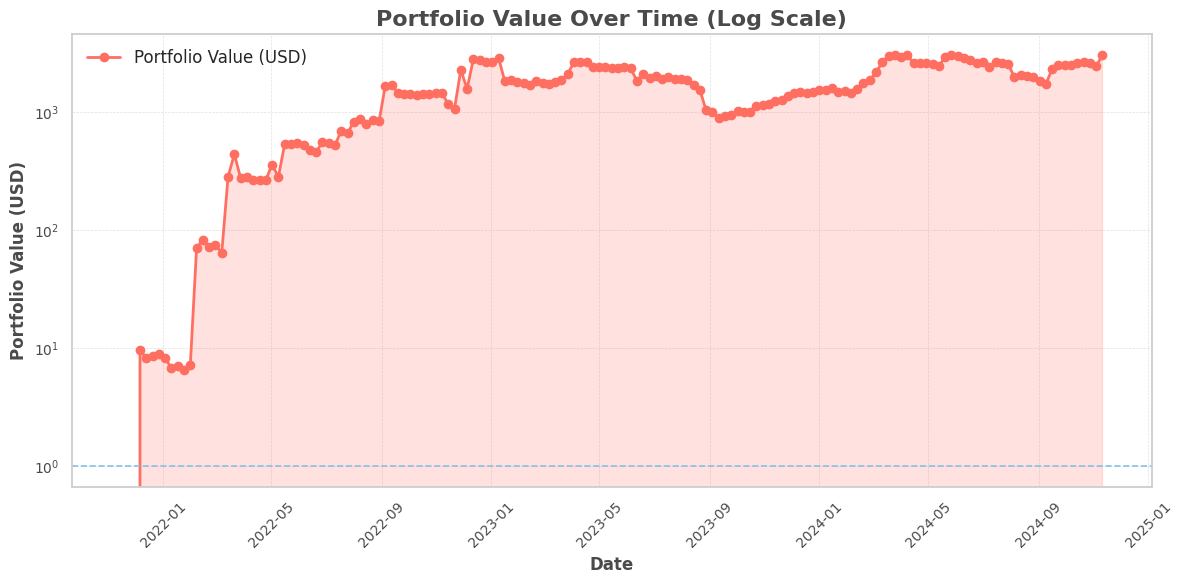

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7: Visualization
# Set seaborn style for improved aesthetics
sns.set_theme(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the data with a log scale
plt.plot(portfolio_over_time['timestamp'], portfolio_over_time['value_usd'],
         marker='o', linestyle='-', linewidth=2, markersize=6,
         color='#FF6F61', label="Portfolio Value (USD)")

# Set log scale for y-axis
plt.yscale('log')

# Customizing chart
plt.title('Portfolio Value Over Time (Log Scale)', fontsize=16, fontweight='bold', color='#4A4A4A')
plt.xlabel('Date', fontsize=12, fontweight='bold', color='#4A4A4A')
plt.ylabel('Portfolio Value (USD)', fontsize=12, fontweight='bold', color='#4A4A4A')
plt.xticks(fontsize=10, rotation=45, color='#4A4A4A')
plt.yticks(fontsize=10, color='#4A4A4A')

# Add grid with custom color
plt.grid(color='#D3D3D3', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Highlight significant changes (optional, for style)
plt.axhline(y=1, color='#85C1E9', linestyle='--', linewidth=1.2, label='Threshold')
plt.fill_between(portfolio_over_time['timestamp'], portfolio_over_time['value_usd'],
                 color='#FF6F61', alpha=0.2)

# Show plot
plt.tight_layout()
plt.show()


In [9]:
# Step 8: Fetch token details and display

# Define the API endpoint for portfolio overview
portfolio_overview_url = "https://api.1inch.dev/portfolio/portfolio/v4/overview/erc20/details"
token_details_url = "https://api.1inch.dev/token/v1.2/{chain_id}/custom/{contract_address}"

# Placeholder for collected token data
token_data = []

# Iterate through each chain ID and user address
for chain_name, chain_id in chain_ids.items():
    for user_address in user_addresses:
        # Request options
        requestOptions = {
            "headers": {
                "Authorization": f"Bearer {userdata.get('1inchApiKey')}"  # Replace with your API key retrieval
            },
            "params": {
                "addresses": [user_address],
                "chain_id": chain_id,
                "timerange": "1day",
                "closed": True,
                "closed_threshold": 1
            }
        }

        # Fetch portfolio overview data
        response = requests.get(portfolio_overview_url, headers=requestOptions['headers'], params=requestOptions['params'])
        if response.status_code == 200:
            portfolio_overview = response.json()
        else:
            print(f"Failed to fetch portfolio overview for chain: {chain_name}, address: {user_address}. "
                  f"Status Code: {response.status_code}")
            continue

        # Process tokens from the portfolio overview
        for token in portfolio_overview.get('result', []):
            contract_address = token['contract_address']
            value_usd = token['value_usd']

            # Fetch token details
            token_response = requests.get(
                token_details_url.format(chain_id=chain_id, contract_address=contract_address),
                headers={"Authorization": f"Bearer {userdata.get('1inchApiKey')}"}
            )

            if token_response.status_code == 200:
                token_info = token_response.json()
                symbol = token_info.get('symbol', 'Unknown')
                token_name = token_info.get('name', 'Unknown')

                # Append token details to the list
                token_data.append({
                    "chain": chain_name,
                    "user_address": user_address,
                    "symbol": symbol,
                    "token_name": token_name,
                    "contract_address": contract_address,
                    "value_usd": value_usd
                })
            else:
                print(f"Failed to fetch details for contract {contract_address} on chain {chain_name}")

# Display the collected token data
for token in token_data:
    print(f"Chain: {token['chain']}, User: {token['user_address']}, "
          f"Symbol: {token['symbol']}, Token Name: {token['token_name']}, "
          f"Contract Address: {token['contract_address']}, Value (USD): {token['value_usd']:.2f}")


Chain: arbitrum, User: 0x8A43e8291f05Fc91d9E45CE36b8812F10e50D554, Symbol: ETH, Token Name: Ether, Contract Address: 0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee, Value (USD): 15.66
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: ETH, Token Name: Ether, Contract Address: 0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee, Value (USD): 784.97
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: USDC, Token Name: USD Coin, Contract Address: 0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48, Value (USD): 693.40
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: DAI, Token Name: Dai Stablecoin, Contract Address: 0x6b175474e89094c44da98b954eedeac495271d0f, Value (USD): 73.74
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: SUSHI, Token Name: SushiToken, Contract Address: 0x6b3595068778dd592e39a122f4f5a5cf09c90fe2, Value (USD): 10.09
Chain: ethereum, User: 0x65392485b8d869E59B5B2A3Cf7de815ed16939aA, Symbol: USD

In [11]:
from prettytable import PrettyTable

# Consolidate portfolio data
consolidated_data = [
    {
        "symbol": token["symbol"],
        "token_name": token["token_name"],
        "contract_address": token["contract_address"],
        "chain": token["chain"],
        "usd_value": token["value_usd"]
    }
    for token in token_data
]

# Sort data by usd_value in descending order
consolidated_data = sorted(consolidated_data, key=lambda x: x["usd_value"], reverse=True)

# Create a table using PrettyTable
table = PrettyTable()
table.field_names = ["Symbol", "Token Name", "Contract Address", "Chain", "USD Value"]

# Populate the table
for token in consolidated_data:
    table.add_row([token["symbol"], token["token_name"], token["contract_address"], token["chain"], f"${token['usd_value']:.2f}"])

# Print the sorted table
print(table)


+--------+---------------------------------+--------------------------------------------+----------+-----------+
| Symbol |            Token Name           |              Contract Address              |  Chain   | USD Value |
+--------+---------------------------------+--------------------------------------------+----------+-----------+
|  ETH   |              Ether              | 0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee | ethereum |  $784.97  |
|  USDC  |             USD Coin            | 0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48 | ethereum |  $693.40  |
|  WBTC  |         Wrapped Bitcoin         | 0x68f180fcce6836688e9084f035309e29bf0a2095 | optimism |  $437.11  |
|  ETH   |              Ether              | 0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee | ethereum |  $275.69  |
| WstETH | Wrapped liquid staked Ether 2.0 | 0x1f32b1c2345538c0c6f582fcb022739c4a194ebb | optimism |  $174.15  |
|  DAI   |          Dai Stablecoin         | 0x6b175474e89094c44da98b954eedeac495271d0f | ethere